<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


***


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

## Load the dataframe


Load the data


In [3]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

data.head(82)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,2020-04-22,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,4,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
78,79,2020-05-30,Falcon 9,9525.000000,ISS,KSC LC 39A,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
79,80,2020-06-04,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,5,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,5,B1049,-80.577366,28.561857,1
80,81,2020-06-13,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,3,B1059,-80.577366,28.561857,1


In [4]:
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')
# Orbits are a target outcome Falcon 9 mission, so we orbit dropped of the Falcon 9 missions -  orbit not chosen by customers. 
# Orbit delivery is a key customer requirement = successful delivery of payload to chosen orbit and should be studied separately as a mission outcome classifcation model.
X= X.drop(columns=['Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS', 'Orbit_ES-L1','Orbit_GEO','Orbit_GTO','Orbit_HEO','Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO', 'Orbit_VLEO'],axis=1)
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [5]:
# Decripitive statistics for X data set review key features in data set.
print('Descriptive Statistics Table')
X.describe(include="all")

Descriptive Statistics Table


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,0.611111,0.244444,0.144444,0.144444,0.022222,...,0.033333,0.044444,0.033333,0.011111,0.222222,0.777778,0.588889,0.411111,0.211111,0.788889
std,26.124701,4694.671720,1.213172,1.595288,1.710254,0.490229,0.432165,0.353509,0.353509,0.148231,...,0.180511,0.207235,0.180511,0.105409,0.418069,0.418069,0.494792,0.494792,0.410383,0.410383
min,1.000000,350.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Create list of features and outcomes from the data set for model analysis.
fn = list (X.columns)
cn = ['Did Not Land','Landed']
Class = data['Class']

In [7]:
# "VarianceThreshold is a simple baseline approach to improved feature selection whose variance doesn’t meet threshold for significance". SKLearn
# Found that if we remove features that are either one or zero in more than 70% of our samples, random "noise" for modeling (see bar graphs below).
from sklearn.feature_selection import VarianceThreshold
X_new = VarianceThreshold(threshold=(.7 * (1 - .7))).fit_transform(X)
X = X_new
print(X.shape)

(90, 9)


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [8]:
Y= pd.Series(data['Class'])
Y= Y.to_numpy()

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [9]:
# students get this 
transform = preprocessing.StandardScaler()

In [10]:
X = transform.fit_transform(X)
X.shape

(90, 9)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=2)
X.shape,Y.shape,X_train.shape,Y_train.shape, X_test.shape,Y_test.shape

((90, 9), (90,), (72, 9), (72,), (18, 9), (18,))

we can see we have 9 key features and only 18 test samples.


In [12]:
# Model Analysis of features selected - we look at feature importance and box plot to support selection.

Accuracy on test data: 0.89


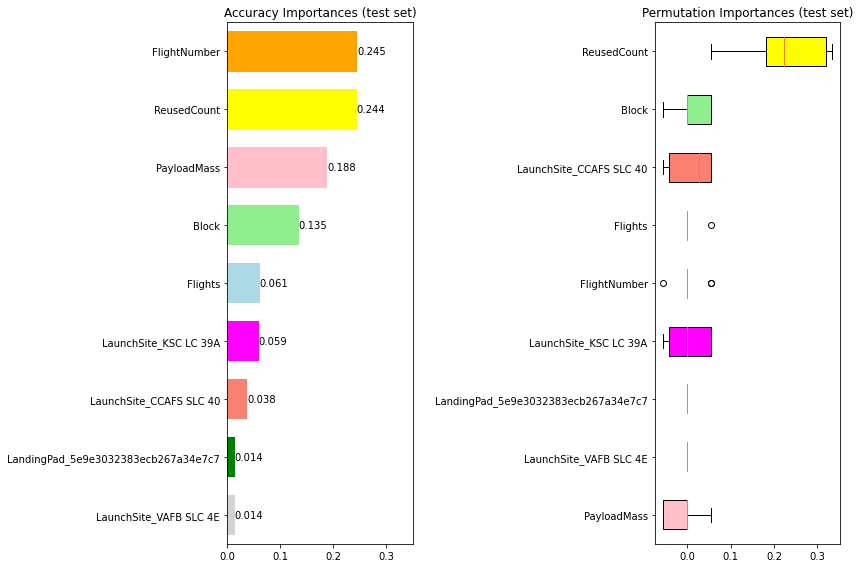

In [13]:
# Showing the key features importance for accuracy and permutation (see reference sklearn website)
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

clf = RandomForestClassifier(n_estimators=100, random_state=2)
clf.fit(X_train, Y_train)
print("Accuracy on test data: {:.2f}".format(clf.score(X_test, Y_test)))


result = permutation_importance(clf, X_test, Y_test, n_repeats=10, random_state=2)
perm_sorted_idx = result.importances_mean.argsort()
feature_perm_sort=[ ]
for i in perm_sorted_idx: feature_perm_sort.append (fn[i])

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
feature_tree_sort=[]
for i in tree_importance_sorted_idx: feature_tree_sort.append (fn[i])
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

color_number={0:'orange', 1:'pink', 2:'lightblue', 3:'lightgreen', 4:'yellow', 5:'salmon', 6:'magenta', 7:'lightgrey', 8:'green', 9:'cyan',10:'blue', 11:'red', 12:'purple', 13:'grey'}
tree_colors= []
for number in tree_importance_sorted_idx:
    tree_colors.append(color_number[number]),
perm_colors= []
for number in perm_sorted_idx:
    perm_colors.append(color_number[number]),

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
hbars = ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height= 0.7, color= tree_colors)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(feature_tree_sort)
ax1.set_ylim((0, len(clf.feature_importances_)))
# Label with specially formatted floats
ax1.bar_label(hbars, fmt='%.3f')
ax1.set_xlim(0, .35)
ax1.set_title("Accuracy Importances (test set)")

bplot= ax2.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels= feature_perm_sort,
    patch_artist=True,
)
ax2.set_title("Permutation Importances (test set)")

for patch, color in zip(bplot['boxes'], perm_colors):
        patch.set_facecolor(color)

fig.tight_layout()
plt.show()
fs= tree_indices - 0.5


## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [14]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, parameters, cv=10).fit(X_train, Y_train)

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [15]:
print("Log Reg Best Parameters:", logreg_cv.best_params_)
print("Log Reg Accuracy, Best Score, Train Set:",logreg_cv.best_score_)

Log Reg Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Log Reg Accuracy, Best Score, Train Set: 0.7357142857142857


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [16]:
logreg_acc = logreg_cv.score(X_test, Y_test)
print("Log Reg Accuracy Test Set:",logreg_acc)

Log Reg Accuracy Test Set: 0.9444444444444444


Lets look at the confusion matrix:


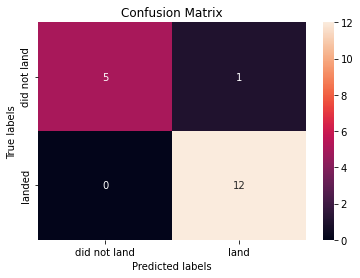

In [17]:
logreg_yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, logreg_yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [18]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv= 10).fit(X_train,Y_train)

In [19]:
print("SVM Best Parameters",svm_cv.best_params_)
print("SVM Accuracy, Best Score, Train Set:",svm_cv.best_score_)

SVM Best Parameters {'C': 1000.0, 'gamma': 0.03162277660168379, 'kernel': 'rbf'}
SVM Accuracy, Best Score, Train Set: 0.8321428571428573


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [20]:
svm_cv_acc = svm_cv.score(X_test,Y_test)
print('SVM Accuracy, Test Set Score:', svm_cv_acc )

SVM Accuracy, Test Set Score: 0.6666666666666666


We can plot the confusion matrix


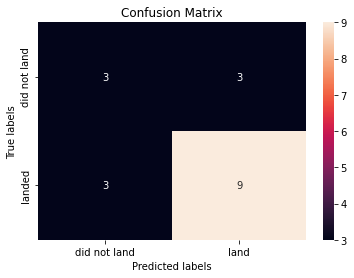

In [21]:
svm_yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,svm_yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [22]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [10]}
d_tree = DecisionTreeClassifier(random_state=0)
tree_cv = GridSearchCV(d_tree, parameters,cv= 10).fit(X_train, Y_train)

In [23]:
tree_cv_best= tree_cv.best_params_
print("Tree Best Parameters:",tree_cv.best_params_)
tree_cv_acc= tree_cv.best_score_
print("Tree Accuracy, Best Score, Train Set:", tree_cv.best_score_)

Tree Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
Tree Accuracy, Best Score, Train Set: 0.8017857142857142


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [24]:
tree_cv_acc = tree_cv.score(X_test,Y_test)
print('Tree Accuracy Score, Test Set:', tree_cv_acc)

Tree Accuracy Score, Test Set: 0.8888888888888888


We can plot the confusion matrix


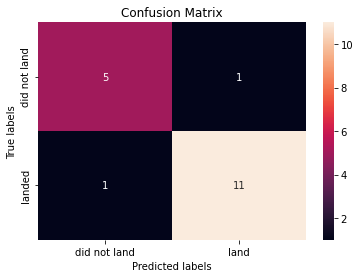

In [25]:
tree_yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,tree_yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [26]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters, cv= 10).fit(X_train,Y_train)

In [27]:
print("KNN Best Parameters:", knn_cv.best_params_)
print("KNN Accuracy, Best Score, Train Set:", knn_cv.best_score_)

KNN Best Parameters: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}
KNN Accuracy, Best Score, Train Set: 0.7892857142857143


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method:

In [28]:
knn_cv_acc = knn_cv.score(X_test, Y_test)
print('KNN Accuracy Score, Test Set:', knn_cv_acc)

KNN Accuracy Score, Test Set: 0.7222222222222222


We can plot the confusion matrix


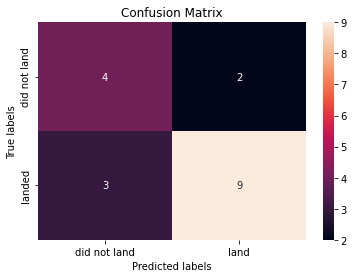

In [29]:
knn_yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,knn_yhat)

## TASK  12


Find the method performs best:


In [30]:
from sklearn.metrics import classification_report
target_names = ['Did Not Land', 'Landed']
logreg_report = classification_report(Y_test, logreg_yhat, target_names=target_names)
print('\t\t Logistic Regression Metrics Report')
print(logreg_report,'\n')

svm_report = classification_report(Y_test, svm_yhat, target_names=target_names)
print('\t\t SVM Metrics Report')
print(svm_report,'\n')

tree_report = classification_report(Y_test, tree_yhat, target_names=target_names)
print('\t\t Decision Tree Metrics Report')
print(tree_report,'\n')

knn_report = classification_report(Y_test, knn_yhat, target_names=target_names)
print('\t\t KNN Metrics Report')
print(svm_report,'\n')

		 Logistic Regression Metrics Report
              precision    recall  f1-score   support

Did Not Land       1.00      0.83      0.91         6
      Landed       0.92      1.00      0.96        12

    accuracy                           0.94        18
   macro avg       0.96      0.92      0.93        18
weighted avg       0.95      0.94      0.94        18
 

		 SVM Metrics Report
              precision    recall  f1-score   support

Did Not Land       0.50      0.50      0.50         6
      Landed       0.75      0.75      0.75        12

    accuracy                           0.67        18
   macro avg       0.62      0.62      0.62        18
weighted avg       0.67      0.67      0.67        18
 

		 Decision Tree Metrics Report
              precision    recall  f1-score   support

Did Not Land       0.83      0.83      0.83         6
      Landed       0.92      0.92      0.92        12

    accuracy                           0.89        18
   macro avg       0.88      0.8

# Logistic Regression is our best method for predicting a successful landing: Accuracy = 94%, Precision = 92%, Recall = 100% and F1-Score = 96% 

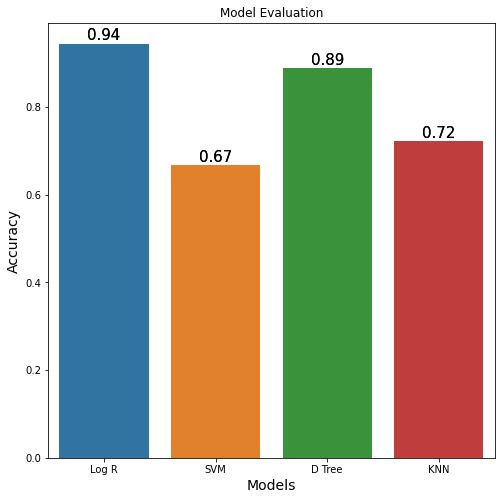

In [31]:
# Model Accruacy Bar Chart
bar_data = {'Model': ['Log R', 'SVM', 'D Tree', 'KNN'],'Accuracy': [logreg_acc, svm_cv_acc, tree_cv_acc, knn_cv_acc]}
df = pd.DataFrame(bar_data, columns=['Model', 'Accuracy'])

plt.figure(figsize=(8, 8))
plots = sns.barplot(x="Model", y="Accuracy", data=df)
plots = sns.barplot(x="Model", y="Accuracy", data=df)
plt.xlabel("Models", size=14)
plt.ylabel("Accuracy", size=14)
plt.title("Model Evaluation")

# Iterating over the bars one-by-one
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 
plt.show()

# Logistic Regression is chosen as Best Method to predict Falcon 9 booster landing successfully. 
 Note that variation threshold and permutation of feature importance methods were used to reduce random noise and improve the models.

Authors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By    | Change Description      |
| ----------------- | ------- | ------------- | ----------------------- |
| 2021-08-31        | 1.1     | Lakshmi Holla | Modified markdown       |
| 2020-09-20        | 1.0     | Joseph        | Modified Multiple Areas |


Copyright © 2020 IBM Corporation. All rights reserved.
